In [ ]:
# 1. Load Libraries & Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# Adjust plotting
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
# Load data
df = pd.read_csv("../data/raw/data.csv") 
df.head()


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [ ]:
# data overview
df.shape
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
count,95662,95662,95662,95662,95662,95662,95662.0,95662,95662,95662,95662,9.566200e+04,9.566200e+04,95662,95662.000000,95662.000000
unique,95662,94809,3633,3627,3742,1,NaN,6,23,9,4,NaN,NaN,94556,NaN,NaN
top,TransactionId_35670,BatchId_67019,AccountId_4841,SubscriptionId_3829,CustomerId_7343,UGX,NaN,ProviderId_4,ProductId_6,financial_services,ChannelId_3,NaN,NaN,2018-12-24T16:30:13Z,NaN,NaN
freq,1,28,30893,32630,4091,95662,NaN,38189,32635,45405,56935,NaN,NaN,17,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,256.0,NaN,NaN,NaN,NaN,6.717846e+03,9.900584e+03,NaN,2.255974,0.002018
std,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.233068e+05,1.231221e+05,NaN,0.732924,0.044872
min,NaN,NaN,NaN,NaN,NaN,NaN,256.0,NaN,NaN,NaN,NaN,-1.000000e+06,2.000000e+00,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,256.0,NaN,NaN,NaN,NaN,-5.000000e+01,2.750000e+02,NaN,2.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,256.0,NaN,NaN,NaN,NaN,1.000000e+03,1.000000e+03,NaN,2.000000,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,256.0,NaN,NaN,NaN,NaN,2.800000e+03,5.000000e+03,NaN,2.000000,0.000000


In [ ]:
# IDENTIFY if there is a missing value 
missing = df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

Series([], dtype: int64)

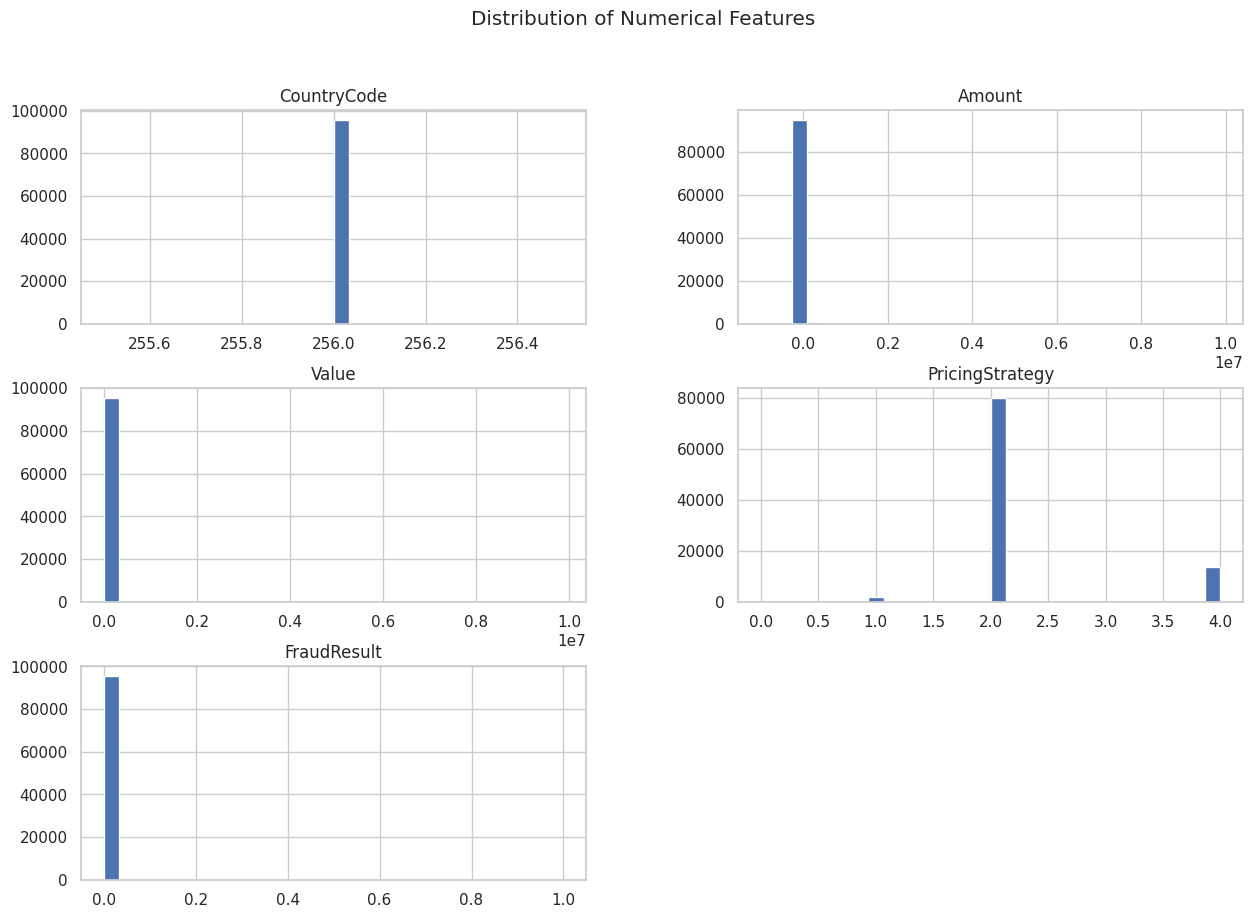

In [8]:
#summary stats and distributions 
#1, numeeric columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols].hist(bins=30, figsize=(15,10))
plt.suptitle("Distribution of Numerical Features")
plt.show()


##  Interpretation of Numerical Feature Distributions

### 1. **CountryCode**

* **Observation**: Only one bar is shown at `256`.
* **Interpretation**: The dataset includes transactions from **one country only** (likely Uganda based on `+256` country code).
* **Action**: This feature has **no variance**, so it's **not useful for modeling** and can be dropped.
### 2. **Amount**

* **Observation**: Heavy skew to the right; most values are close to zero with some extremely large ones.
* **Interpretation**: Indicates **skewed spending pattern**, with a few high-value outliers.
* **Action**: Consider:

  * **Log transformation**
  * **Winsorization (capping)** of extreme values
  * Or using **robust models** that can handle outliers (like tree-based models)

### 3. **Value**

* **Observation**: Almost identical distribution to `Amount` 
* **Interpretation**: Likely to be the **absolute value** of `Amount`.
* **Action**: Retain only one of them — probably `Amount` if you're capturing inflows/outflows (debit/credit).


### 4. **PricingStrategy**

* **Observation**: Mostly centered around a single value (e.g., 2), with smaller groups in others.
* **Interpretation**: Most customers are under one pricing strategy.
* **Action**: Could be useful — encode this feature using **one-hot** or **ordinal encoding** and test for model usefulness.

### 5. **FraudResult**

* **Observation**: Extremely imbalanced — most values are 0 (non-fraud).
* **Interpretation**: Fraud is **rare**, which is expected in real-world datasets.
* **Action**:

  * May consider **upsampling** or **SMOTE** if you ever use this as a proxy target or feature.
  * For now, observe its correlation with behavior during proxy label creation.

###  Distribution Analysis - Numerical Features

- `CountryCode` is constant and can be dropped due to no variance.
- `Amount` and `Value` show heavy right-skewness, with many small transactions and few extremely large ones. A log transformation or robust scaling might be needed.
- `PricingStrategy` is dominated by one category but still provides some variation. Consider it for encoding.
- `FraudResult` is highly imbalanced with very few frauds — this reflects real-world data but limits its predictive power unless handled carefully.

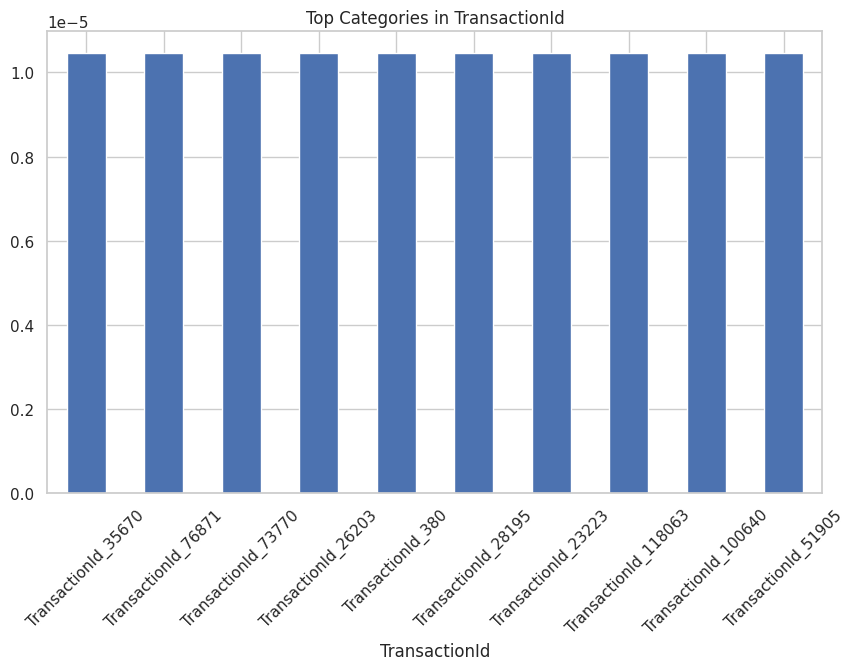

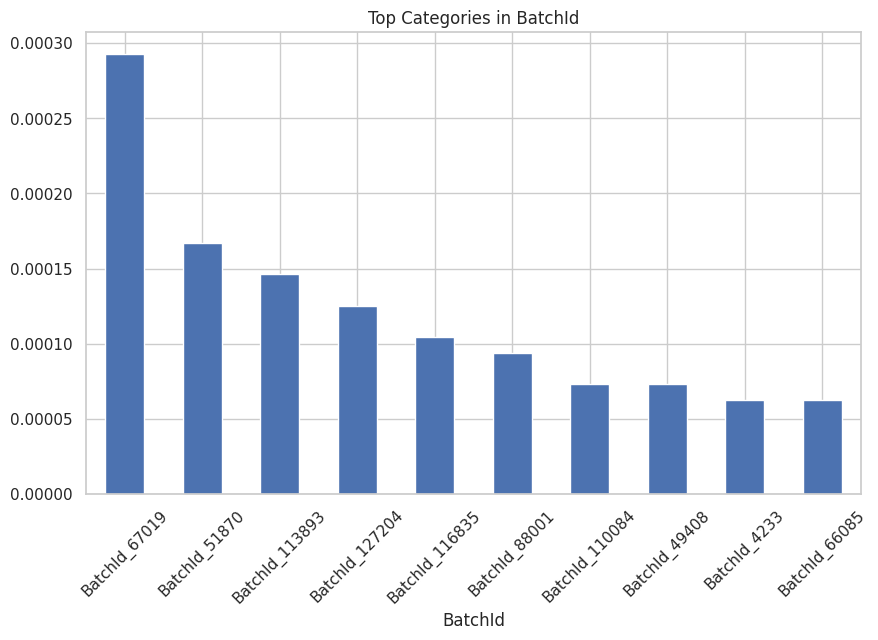

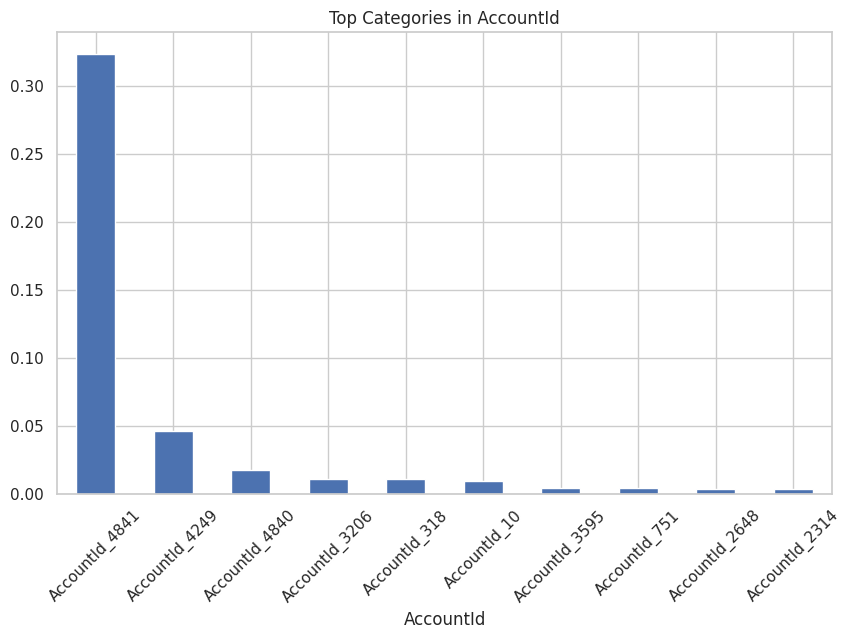

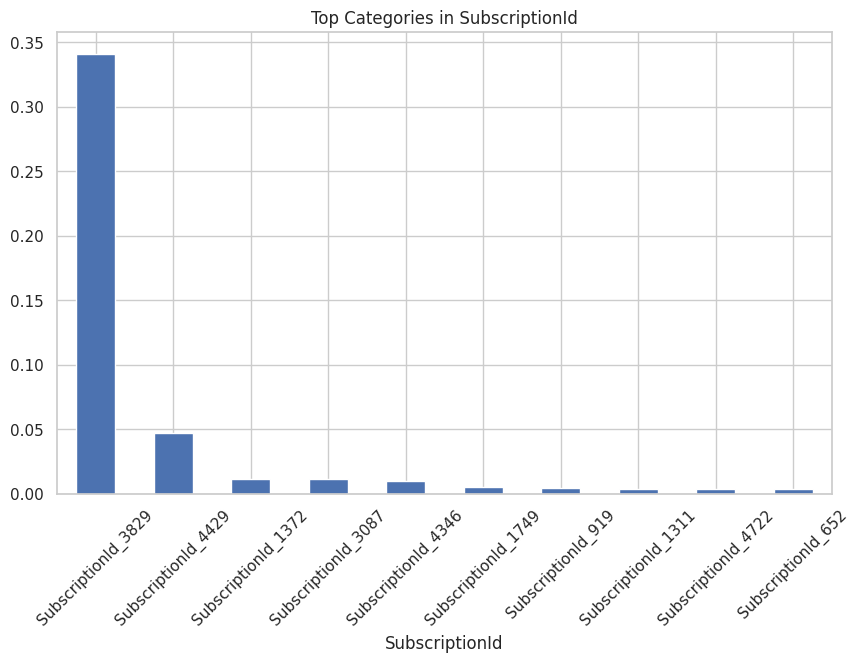

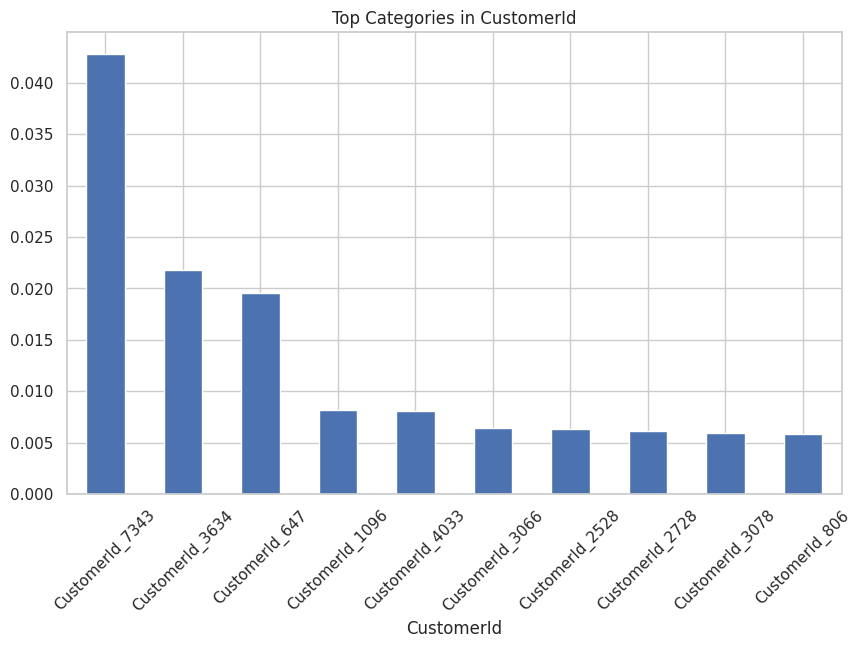

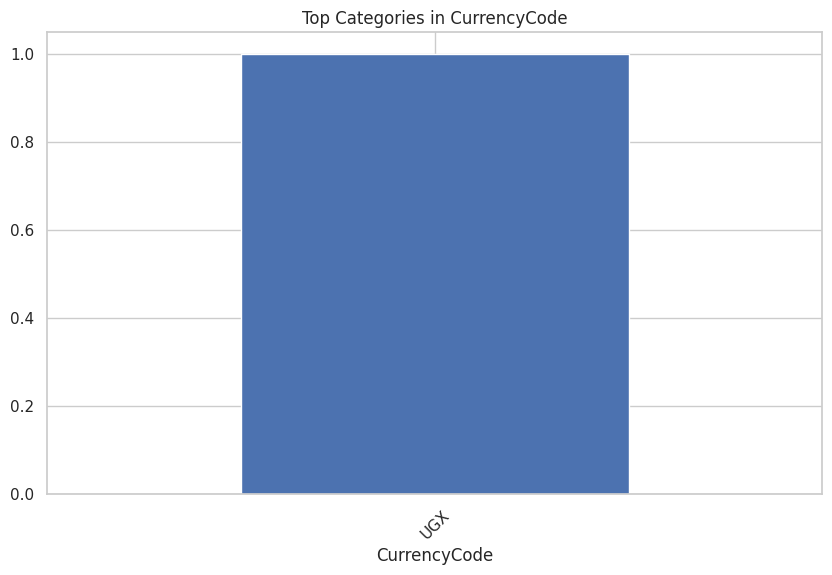

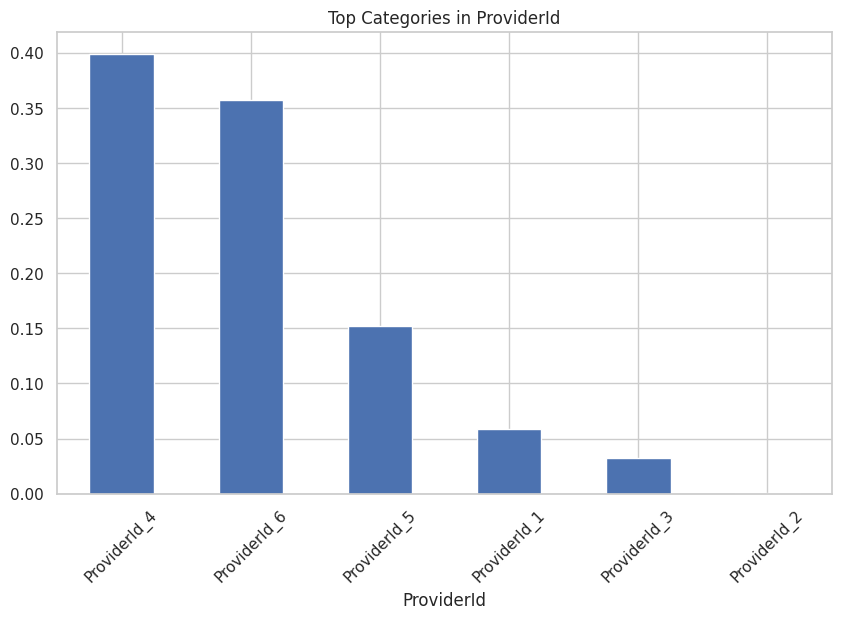

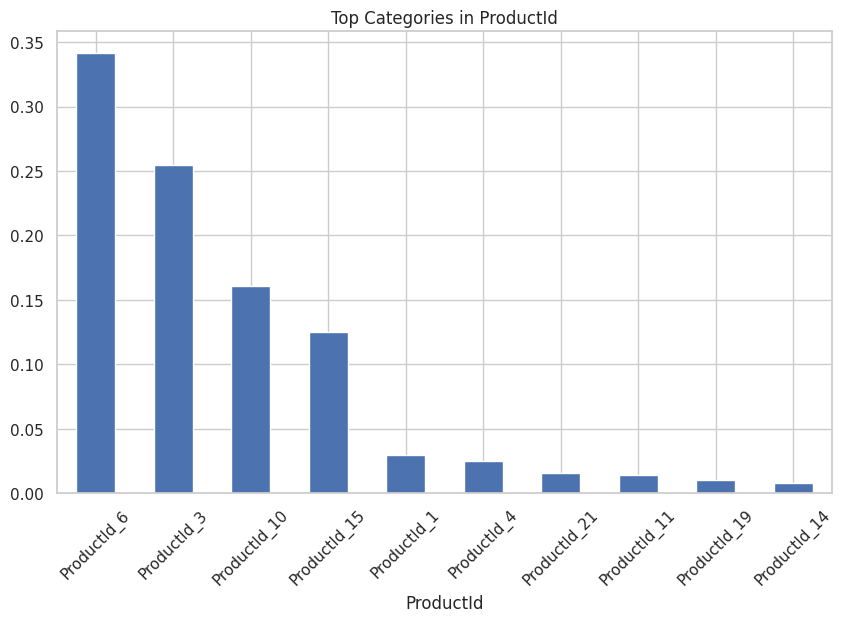

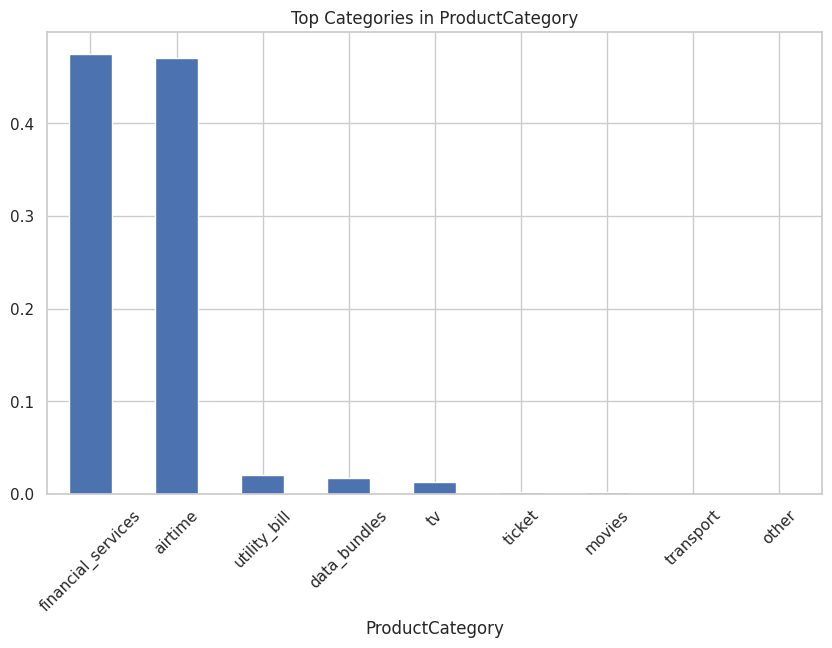

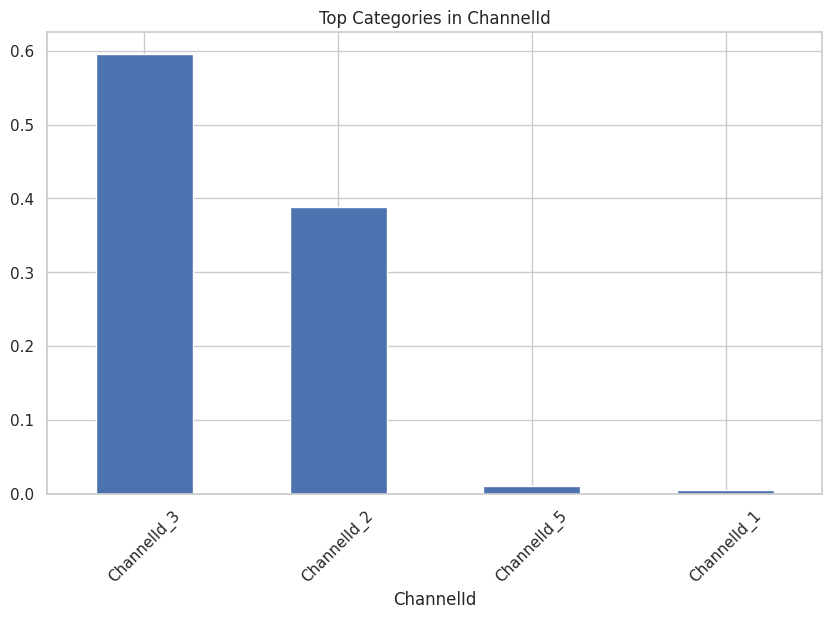

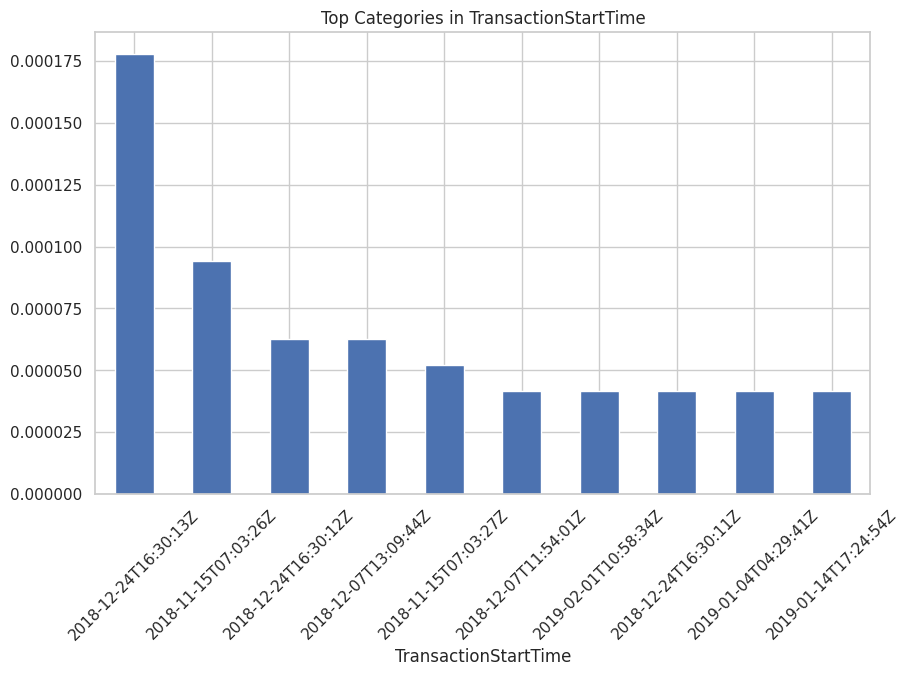

In [9]:
# 2, catagorical column 
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure()
    df[col].value_counts(normalize=True).head(10).plot(kind='bar')
    plt.title(f"Top Categories in {col}")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()


| Column Name              | Definition                        | Keep?                | Reason / Use                                                   |
| ------------------------ | --------------------------------- | -------------------- | -------------------------------------------------------------- |
| **TransactionId**        | Unique transaction ID             |  Drop               | Purely a unique identifier, no predictive value                |
| **BatchId**              | Processing batch ID               |  Drop               | Operational, not related to customer behavior                  |
| **AccountId**            | Platform customer ID              |  Maybe             | If stable across time, use for RFM aggregation; otherwise drop |
| **SubscriptionId**       | Customer subscription ID          |  Drop               | Similar to AccountId, redundant                                |
| **CustomerId**           | True customer identifier          |  Keep               | Anchor for grouping, RFM features, target creation             |
| **CurrencyCode**         | Country currency                  |  Drop               | Only one value → no variance                                   |
| **CountryCode**          | Geographical code                 |  Drop               | Only one value (256) from EDA → no variance                    |
| **ProviderId**           | Source provider of item           |  Keep               | Behavioral signal — skewed but informative                     |
| **ProductId**            | Specific item bought              |  Keep               | Use encoding or frequency-based transformation                 |
| **ProductCategory**      | Group of products                 |  Keep               | Abstract category — useful for generalizing behavior           |
| **ChannelId**            | Channel used (web, Android, etc.) |  Keep               | Customer behavior insight keep                               |
| **Amount**               | Raw signed transaction value      |  Keep               | Financial behavior metric apply log transform or scale       |
| **Value**                | Absolute amount                   |  Drop               | Redundant with `abs(Amount)`                                   |
| **TransactionStartTime** | Time of transaction               |  Keep (transformed) | Use to extract `recency`, `hour`, `month`, etc.                |
| **PricingStrategy**      | Merchant pricing tier             |  Keep               | Might reflect riskier customer/product types                   |
| **FraudResult**          | Was the transaction fraudulent?   |  Optional          | Could use as a **feature**, not as a target                    |


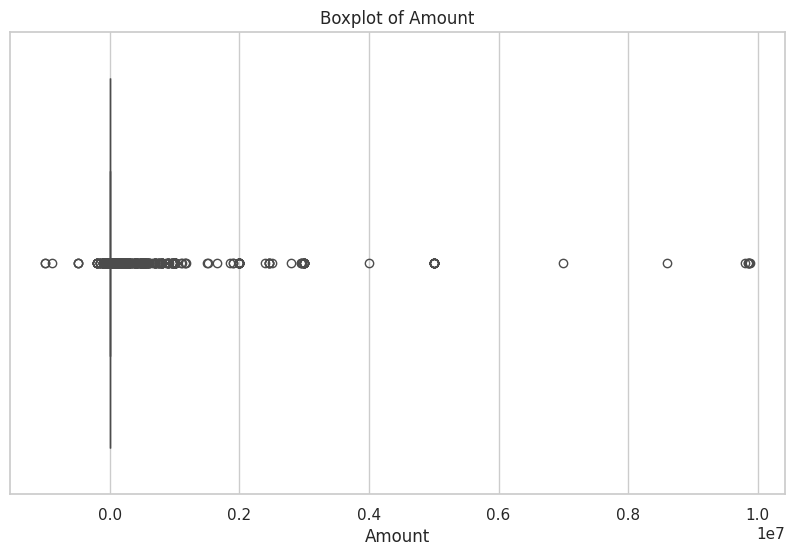

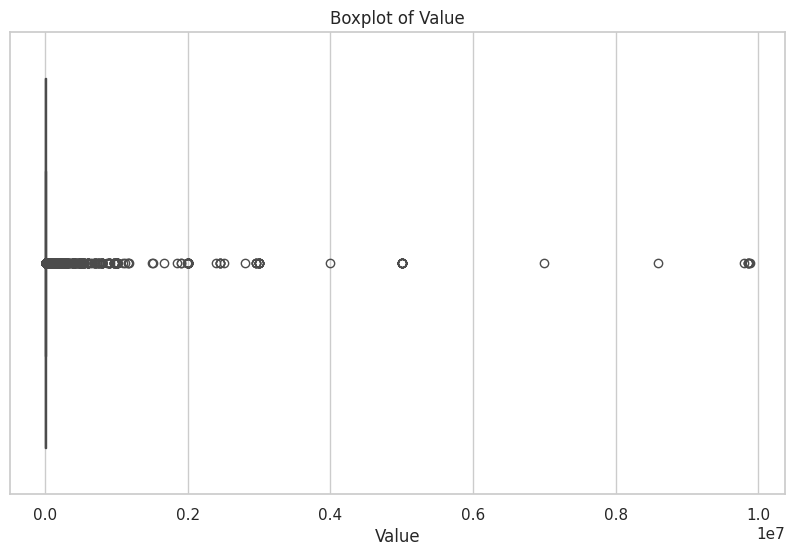

In [10]:
# outlier detection 
for col in ['Amount', 'Value']:  # Add more if needed
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


##  Boxplot Interpretation: `Amount`

###  What the boxplot shows:

* A **very long tail** to the right → extreme **positive skewness**.
* A **dense cluster of values near 0** → most transactions are small.
* **Many outliers** — shown as dots — on the high end.


###  What can we say?

1. **Skewed Distribution**

   * The distribution of `Amount` is **highly right-skewed**.
   * This means **most transactions are low in value**, but there are a few very large transactions.

2. **Presence of Outliers**

   * There are **many extreme values** far from the median.
   * These could be valid high-value purchases or potential **anomalies/fraud**.
   * we may want to **log-transform** or **cap (winsorize)** them depending on modeling strategy.

3. **Impact on Modeling**

   * Algorithms like **Logistic Regression** or **K-Means** are sensitive to skewed data.
   * It’s recommended to apply **scaling** (e.g., StandardScaler, MinMaxScaler) or **log transformation** during feature engineering.

###  Outlier & Distribution Analysis - `Amount`

- The `Amount` feature is highly positively skewed, with a large number of small transactions and a few very high-value outliers.
- These extreme outliers may represent bulk purchases, vendor-related transactions, or potential frauds.
- Before using this variable in modeling, we may consider log transformation or outlier capping to normalize the distribution and reduce the effect of extreme values.

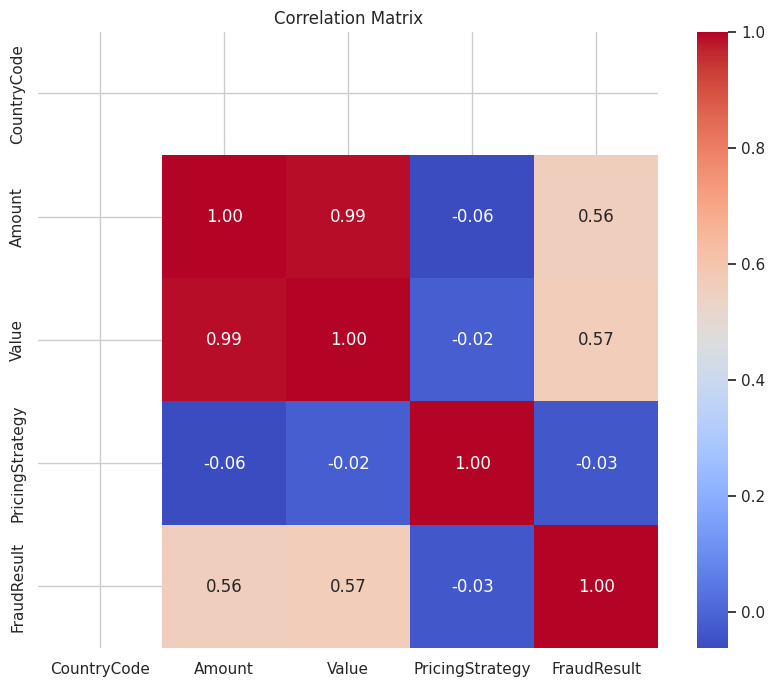

In [11]:
# correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


##  Correlation Matrix Interpretation

This matrix shows **Pearson correlation coefficients** between numerical variables in our dataset.
###  Strong Correlation Between `Amount` and `Value` (r ≈ 0.99)

* **Interpretation**: These two variables are almost identical in behavior.
* **Reason**: Likely, `Value = abs(Amount)`, where `Amount` could be positive (debit) or negative (credit).
* **Action**: we might choose **only one of them** to avoid redundancy during modeling.


###  Moderate Positive Correlation Between `Amount` and `FraudResult` (r ≈ 0.56)

* **Interpretation**: As `Amount` increases, the probability of `FraudResult` = 1 also increases.
* **Business Insight**: Larger transactions may be more likely to be flagged as fraud.
* **Action**: `Amount` could be a **useful predictor** for fraud or risk modeling.


### Weak or No Correlation for:

* `PricingStrategy` vs. any feature (r ≈ -0.02 to -0.06)
* `CountryCode` missing from correlation due to likely being categorical or excluded in plot

**Interpretation**: These features **do not show strong linear relationships** with the others — but they could still be important in **nonlinear models** like trees.

###  Correlation Analysis Insights

1. **Amount and Value** show almost perfect correlation (r = 0.99), indicating they likely represent the same underlying quantity. We may drop one to reduce multicollinearity.
2. **Amount and FraudResult** show a moderate positive correlation (r ≈ 0.56), suggesting that higher transaction amounts might be more prone to fraud.
3. **PricingStrategy** and other features have low or negligible correlation, meaning they may not have a linear relationship but could still be important in nonlinear models.
